In [1]:
from datetime import datetime, timedelta
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as Gridspec
try:
 plt.style.use('./util//matplotlib_stylesheet.mplstyle')
except OSError:
 pass

# CarbonSDK_WebAPI
Quick notebook on how to get forecast and history data out of the CarbonSDK_WebAPI

In [2]:
from lowcarb.carbon_sdk_webapi import CarbonSDK_WebAPI

All available regions from the CarbonSDK with lat. and long. coordinates

In [3]:
regions = [
 {'Latitude': '37.3719', 'Longitude': '-79.8164', 'RegionName': 'eastus'},
 {'Latitude': '36.6681', 'Longitude': '-78.3889', 'RegionName': 'eastus2'},
 {'Latitude': '29.4167', 'Longitude': '-98.5', 'RegionName': 'southcentralus'},
 {'Latitude': '47.233', 'Longitude': '-119.852', 'RegionName': 'westus2'},
 {'Latitude': '33.448376', 'Longitude': '-112.074036', 'RegionName': 'westus3'},
 {'Latitude': '-33.86', 'Longitude': '151.2094', 'RegionName': 'australiaeast'},
 {'Latitude': '53.3478', 'Longitude': '-6.2597', 'RegionName': 'northeurope'},
 {'Latitude': '60.67488', 'Longitude': '17.14127', 'RegionName': 'swedencentral'},
 {'Latitude': '50.941', 'Longitude': '-0.799', 'RegionName': 'uksouth'},
 {'Latitude': '52.3667', 'Longitude': '4.9', 'RegionName': 'westeurope'},
 {'Latitude': '41.5908', 'Longitude': '-93.6208', 'RegionName': 'centralus'},
 {'Latitude': '43.653', 'Longitude': '-79.383', 'RegionName': 'canadacentral'},
 {'Latitude': '46.3772', 'Longitude': '2.3730', 'RegionName': 'francecentral'},
 {'Latitude': '50.110924', 'Longitude': '8.682127', 'RegionName': 'germanywestcentral'},
 {'Latitude': '59.913868', 'Longitude': '10.752245', 'RegionName': 'norwayeast'},
 {'Latitude': '36.6681', 'Longitude': '-78.3889', 'RegionName': 'eastus2euap'},
 {'Latitude': '41.8819', 'Longitude': '-87.6278', 'RegionName': 'northcentralus'},
 {'Latitude': '37.783', 'Longitude': '-122.417', 'RegionName': 'westus'},
 {'Latitude': '41.5908', 'Longitude': '-93.6208', 'RegionName': 'centraluseuap'},
 {'Latitude': '40.890', 'Longitude': '-110.234',  'RegionName': 'westcentralus'},
 {'Latitude': '-35.3075', 'Longitude': '149.1244',  'RegionName': 'australiacentral'},
 {'Latitude': '-35.3075', 'Longitude': '149.1244',  'RegionName': 'australiacentral2'},
 {'Latitude': '-37.8136', 'Longitude': '144.9631',  'RegionName': 'australiasoutheast'},
 {'Latitude': '46.817', 'Longitude': '-71.217', 'RegionName': 'canadaeast'},
 {'Latitude': '43.8345', 'Longitude': '2.1972', 'RegionName': 'francesouth'},
 {'Latitude': '53.073635', 'Longitude': '8.806422',  'RegionName': 'germanynorth'},
 {'Latitude': '58.969975', 'Longitude': '5.733107',  'RegionName': 'norwaywest'},
 {'Latitude': '53.427', 'Longitude': '-3.084', 'RegionName': 'ukwest'}]


region_names = [region['RegionName'] for region in regions]

Using the public CarbonSDK_WebAPI from the hackathon. Appears to have the full access to worldwide data

In [4]:
api = CarbonSDK_WebAPI('https://carbon-aware-api.azurewebsites.net')

Selected regions for this notebook

In [5]:
SELECTED_REGIONS = ['northeurope', 'germanywestcentral', 'canadaeast', 'ukwest']

## Querying forecast data with WebAPI
Gets the forecast data for all SELECTED_REGIONS and groups it into regions

In [6]:
now = datetime.now()
forecast_example_data = api.get_forecast_batch(regions=SELECTED_REGIONS, windowSize=6*60)

api.vs_carbon_average is a pipe function that calculates the 'value_vs_average' against the average of each region between start_time and end_time (in this case, last week with timedelta(days=7))

In [7]:
forecast_example_data = forecast_example_data.pipe(api.vs_carbon_average, start_time=now-timedelta(days=7), end_time=now-timedelta(hours=6))


In [8]:
forecast_example_data.sample(10)

,time,value,region,average_value,value_vs_average
155,2022-10-17 23:45:00+00:00,517.952111,northeurope,531.841048,0.973885
93,2022-10-17 18:35:00+00:00,521.099880,northeurope,531.841048,0.979804
698,2022-10-17 14:45:00+00:00,427.476588,ukwest,438.820661,0.974149
476,2022-10-17 14:20:00+00:00,427.324921,canadaeast,467.520682,0.914024
732,2022-10-17 17:35:00+00:00,438.508958,ukwest,438.820661,0.999290
517,2022-10-17 17:45:00+00:00,430.403516,canadaeast,467.520682,0.920609
14,2022-10-17 12:00:00+00:00,520.263177,northeurope,531.841048,0.978231
757,2022-10-17 19:40:00+00:00,437.512733,ukwest,438.820661,0.997019
655,2022-10-17 11:10:00+00:00,380.067275,ukwest,438.820661,0.866111
597,2022-10-18 00:25:00+00:00,418.100951,canadaeast,467.520682,0.894294


Groupes the dataset into regions

In [9]:
forecast_example_data_grouped = forecast_example_data.groupby('region')

## Plotting Forecast Data

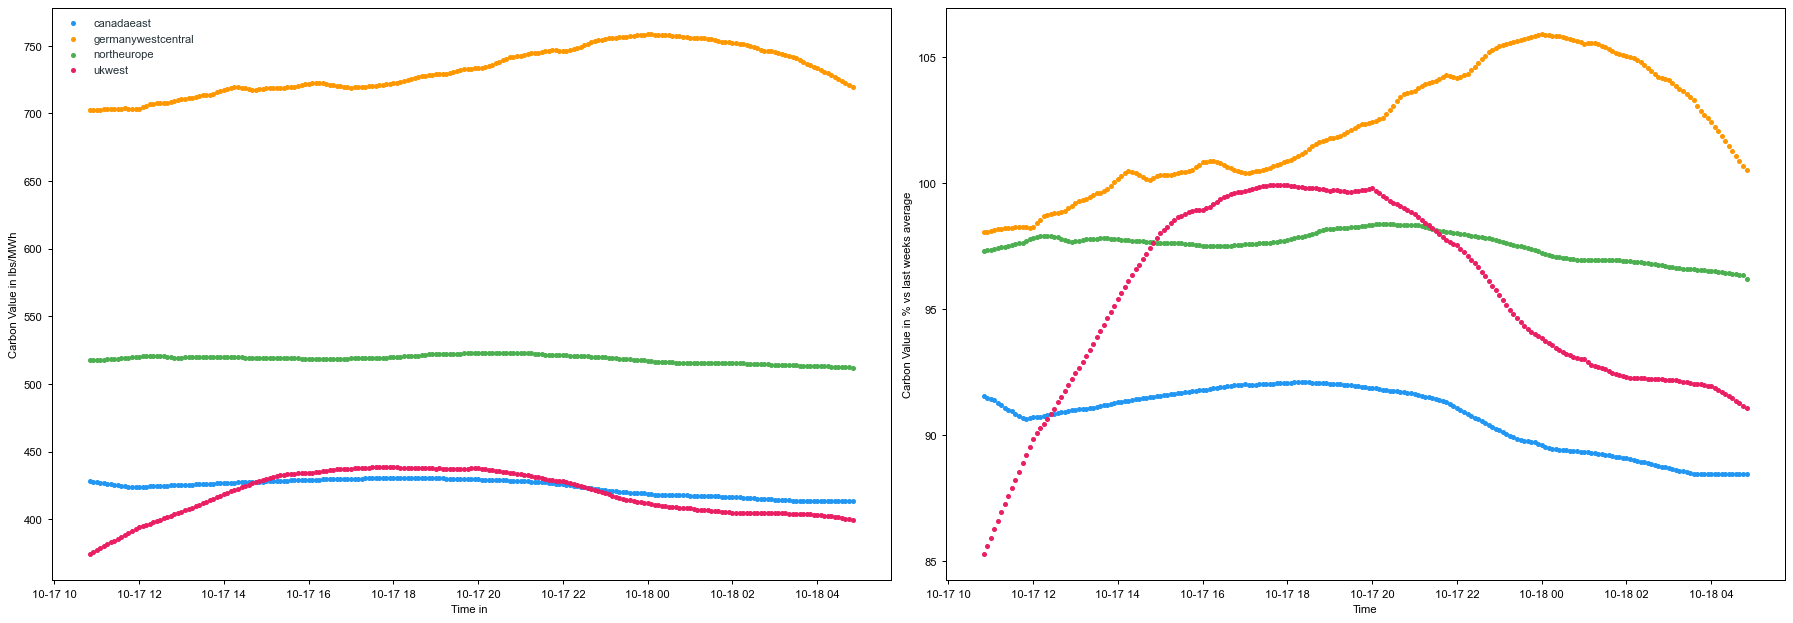

In [10]:
debug_plot_01 = plt.figure(figsize=(20, 7))
debug_plot_01.set_tight_layout(True)
debug_plot_01_ax1 = debug_plot_01.add_subplot(1, 2, 1)
debug_plot_01_ax1.set_xlabel('Time in ')
debug_plot_01_ax1.set_ylabel(f'Carbon Value in lbs/MWh')

for location, df in forecast_example_data_grouped:
  debug_plot_01_ax1.scatter(df['time'], df['value'], label=location)

debug_plot_01_ax1.legend();

debug_plot_01_ax2 = debug_plot_01.add_subplot(1, 2, 2)
debug_plot_01_ax2.set_xlabel('Time')
debug_plot_01_ax2.set_ylabel('Carbon Value in % vs last weeks average')

for location, df in forecast_example_data_grouped:
  debug_plot_01_ax2.scatter(df['time'], df['value_vs_average']*100, label=location)


## Querying History Data
Gets the history data from all SELECTED_REGIONS between start_time and end_time, here, between now and 3 days ago with history_delta as timedelta(days=3, hours=0, minutes=0)

value_vs_average once again calculated with api.vs_carbon_average pipe

In [11]:
history_delta = timedelta(days=3, hours=0, minutes=0)

In [12]:
history_example = api.get_history_batch(regions=SELECTED_REGIONS, start_time=now-history_delta, end_time=now)
history_example = history_example.pipe(api.vs_carbon_average, start_time=now-timedelta(days=7), end_time=now-timedelta(hours=6))

In [13]:
history_example.sample(10)

,time,value,region,average_value,value_vs_average
2011,2022-10-16 06:05:00+00:00,471.736065,canadaeast,467.520682,1.009016
2941,2022-10-15 22:40:00+00:00,445.881300,ukwest,438.820661,1.016090
1311,2022-10-15 18:20:00+00:00,719.851091,germanywestcentral,716.189492,1.005113
57,2022-10-17 06:00:00+00:00,536.146181,northeurope,531.841048,1.008095
1915,2022-10-16 14:05:00+00:00,483.983059,canadaeast,467.520682,1.035212
450,2022-10-15 21:15:00+00:00,559.279392,northeurope,531.841048,1.051591
2032,2022-10-16 04:20:00+00:00,480.354320,canadaeast,467.520682,1.027450
1100,2022-10-16 11:55:00+00:00,690.821180,germanywestcentral,716.189492,0.964579
2390,2022-10-14 22:30:00+00:00,482.622282,canadaeast,467.520682,1.032301
277,2022-10-16 11:40:00+00:00,517.548894,northeurope,531.841048,0.973127


In [14]:
history_example_grouped = history_example.groupby('region')

## Plotting History Data

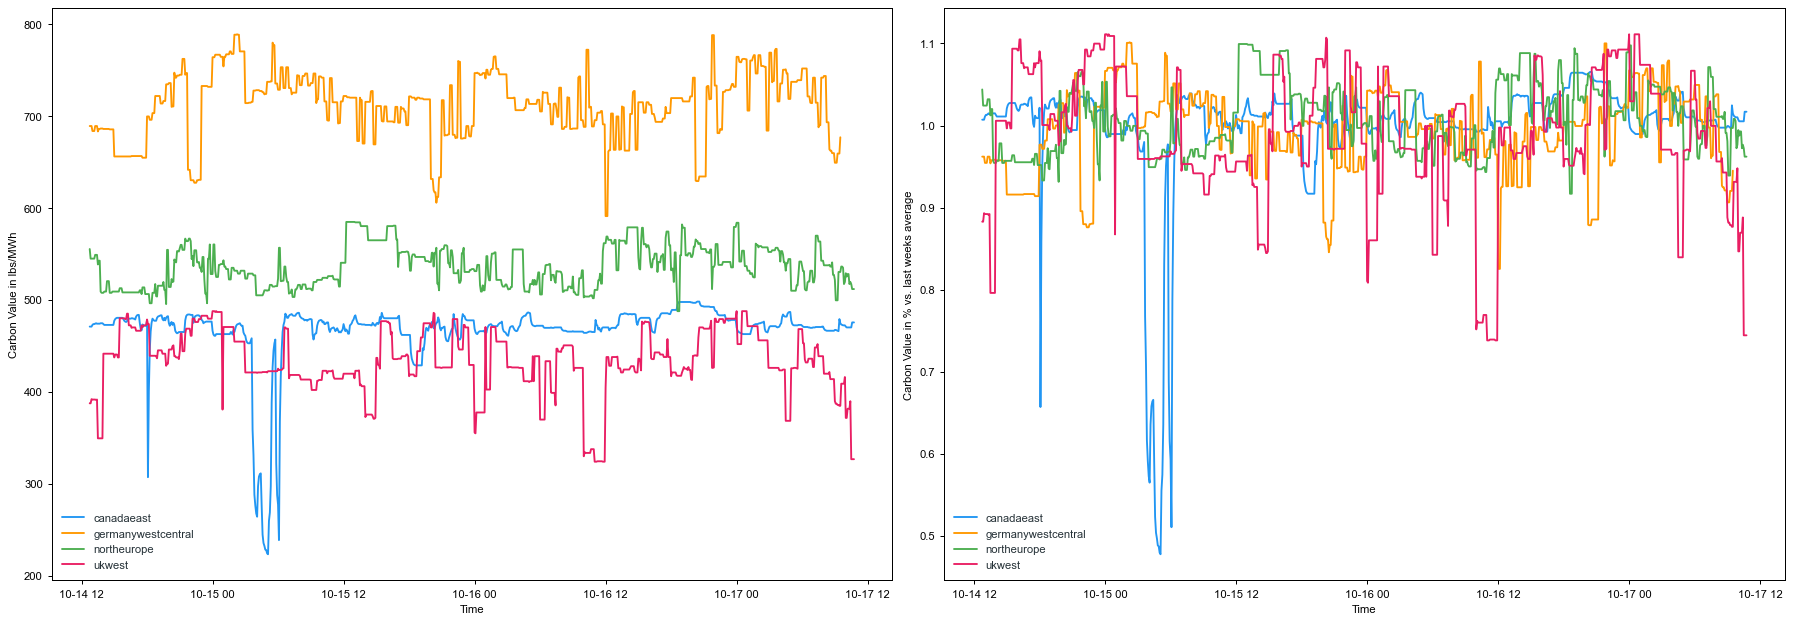

In [15]:
debug_plot_02 = plt.figure(figsize=(20, 7))
debug_plot_02.set_tight_layout(True)
debug_plot_02_ax1 = debug_plot_02.add_subplot(1, 2, 1)
debug_plot_02_ax1.set_xlabel('Time')
debug_plot_02_ax1.set_ylabel('Carbon Value in lbs/MWh')


for region, df in history_example_grouped:
 debug_plot_02_ax1.plot(df['time'], df['value'], label=region)

debug_plot_02_ax1.legend();


debug_plot_02_ax2 = debug_plot_02.add_subplot(1, 2, 2)
debug_plot_02_ax2.set_xlabel('Time')
debug_plot_02_ax2.set_ylabel('Carbon Value in % vs. last weeks average')

for region, df in history_example_grouped:
 debug_plot_02_ax2.plot(df['time'], df['value_vs_average'], label=region)

debug_plot_02_ax2.legend();